In [229]:
from os import pipe #функция которая создает канал связи между процессами (используется в анализе данных)
import pandas as pd #Подключаем библиотеку Pandas, предназначенную для обработки и анализа табличных данных, и назначаем ей псевдоним pd
import numpy as np #Подключаем библиотеку NumPy, инструмент для численных вычислений массивов, матриц и операций над ними, и задаем псевдоним np
import matplotlib #Импортируем графическую библиотеку Matplotlib, которая позволяет создавать статические графики и визуализации
import matplotlib.pyplot as plt #интерфейс библиотеки Matplotlib для построения простых графиков и диаграмм и даём псевдоним plt
import seaborn as sns #Подключаем Seaborn библиотеку для более продвинутых настроек графика и даем ей псевдоним sns
import plotly.graph_objs as go #Подключаем Plotly библиотеку для построения динамических графиков. Импортируется объект Graph Objects (графические объекты), предназначенный для детального управления графиками, с псевдонимом go
import plotly.figure_factory as ff #Импорт объектов figure factory Plotly, позволяющих быстро строить специализированные типы графиков с псевдонимом ff
from plotly import tools #Импортируем вспомогательные инструменты от Plotly, такие как создание сеток субграфиков и управление ими
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #Подготавливаем возможность отображения интерактивных графиков Plotly
import gc #Подключаем библиотеку garbage collector (gc) предназначена для принудительного запуска сборщика мусора Python вручную, которая используется для освобождения памяти при работе с большими объемами данных
from datetime import datetime  #Импортирует класс datetime из стандартной библиотеки Python, позволяющий работать с датами и временем
from sklearn.model_selection import train_test_split #Импортируется метод train_test_split из Scikit-Learn, который разбивает данные на тренировочную и тестовую выборки случайным образом
from sklearn.model_selection import KFold #Импортируем KFold предназначеный для кросс-валидации методом k-fold (разбиение набора данных на k частей и последовательное обучение/тестирование модели на каждой части)
from sklearn.metrics import roc_auc_score #Импортируем метрику качества классификации ROC-AUC Score из модуля метрик Scikit-Learn, которая показывает качество бинарной классификации модели
from sklearn.ensemble import RandomForestClassifier #Импортируем классификатор Random Forest (случайный лес) из ансамбля моделей Scikit-Learn
!pip install catboost
!pip install xgboost
!pip install --upgrade lightgbm
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier #Импортируем ещё один алгоритм ансамблевого метода
from sklearn import svm #Импортируем SVM (Support Vector Machines) линейный и нелинейный классификатор, доступный в библиотеке Scikit-Lear
import lightgbm as lgb #Импортируем LightGBM, быструю реализацию градиентного бустинга деревьев решений, оптимизированная для больших наборов данных и высокой производительности
from lightgbm import LGBMClassifier #Импортируем LGBMClassifier классификационную версию LightGBM, используемаю для решения задач бинарной и многоклассовой классификации

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 245762: invalid start byte

In [221]:
RFC_METRIC = 'gini'  #переменная используется для задания метрики качества расщепления узлов в модели случайного леса (RandomForestClassifier)
NUM_ESTIMATORS = 100 #Переменная определяет количество деревьев, используемых в ансамбле случайного леса. Чем больше число деревьев тем точнее модель, но увеличивается время вычислений
NO_JOBS = 4 #параметр контролирует количество параллельных рабочих процессов (процессоров), используемых при построении дерева
VALID_SIZE = 0.20 # 20% от общего набора данных будет использоваться для проверки модели
TEST_SIZE = 0.20 # 20% данных предназначены для финального тестирования модели
NUMBER_KFOLDS = 5 #Количество частей при кросс-валидации типа k-fold
RANDOM_STATE = 305 #Случайное начальное состояние генератора случайных чисел, обеспечивающее воспроизводимость результатов
MAX_ROUNDS = 1000 #Максимальное количество итераций (деревьев)
EARLY_STOP = 50 #Критерий раннего останова
OPT_ROUNDS = 1000  # Оптимальное количество итераций
VERBOSE_EVAL = 50 #Частота вывода промежуточных результатов обучения

In [230]:
data_df = pd.read_csv(r'creditcard.csv') # Загружаем датафрейм на котором и будем обучать модель

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 245762: invalid start byte

In [ ]:
print("Строки",data_df.shape[0],"Столбцы", data_df.shape[1]) #Смотрим размер датафрейма

In [ ]:
data_df.head()# Выведем первые 5


In [ ]:
data_df.describe() #Выводем статистику числовых значений датофрейма


In [ ]:
total = data_df.isnull().sum().sort_values(ascending = False) #Создаем список столбцов с количеством пропусков, отсортированных по убыванию
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False) #Создаем список столбцов с процентом пропусков, отсортированный по убыванию проценту
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()#из ранее зделаных списков создаем таблицу для наглядности

In [ ]:
temp = data_df["Class"].value_counts()#Подсчитывает количество уникальных значений в столбце "Class"
df = pd.DataFrame({'Class': temp.index,'values': temp.values})#Создается новый датафрейм, который содержит два столбца: Class (уникальные значения из temp) и values (количество вхождений этих значений)
trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Класс мошенничества с кредитными картами — дисбаланс данных (не мошенничество = 0, мошенничество = 1)",
    marker=dict(color="Green"),
    text=df['values']
)# создаем столбчатую диаграму
data = [trace]#создаем списак из созданой диаграмы
layout = dict(title = 'Класс мошенничества с кредитными картами — дисбаланс данных (не мошенничество = 0, мошенничество = 1)',
          xaxis = dict(title = 'Класс', showticklabels=True),
          yaxis = dict(title = 'Количество транзакций'),
          hovermode = 'closest',width=600
         )#задаем макет графика
fig = dict(data=data, layout=layout)#обьеденяем данные и макет
iplot(fig, filename='class')#Сохраняем график под названием class

In [ ]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]
#Здесь создаются две переменные содержащии значения времени транзакций для классов "не мошенничество" и "мошенничество"
hist_data = [class_0, class_1] #создаем список из 2х масивов
group_labels = ['Not Fraud', 'Fraud']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')
#создание графика плотности распределения времени транзакций для двух классов: "не мошенничество" и "мошенничество"

In [ ]:
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x / 3600))
tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()
#создан датафрейм, который содержит статистики по сумме транзакций для каждого часа и класса

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="green")
plt.suptitle("Total Amount")
plt.show();
#Строится два параллельных графика зависимости сумм от часа суток, отдельно для двух классов данных

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="blue")
plt.suptitle("Total Number of Transactions")
plt.show();
#наглядно показать различия в динамике количества транзакций по часам суток для двух групп (классов) данных, обозначенных как 0 и 1. Красный график выделяет активность одной группы на фоне другой, позволяя провести сравнительный анализ.

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();
#создаёт два графика, изображающие средние величины транзакций по часам суток для двух разных классов данных (0 и 1).

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();
#визуализация максимального размера транзакций по часам суток для двух разных классов данных

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();
#Создать два графика, иллюстрирующих медианное значение транзакций по часам суток для двух классов данных

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();
#демонстрирует минимальную сумму транзакций по часам суток для двух классов данных, строит ящичные диаграммы

In [ ]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()
#получение статистики по сумме транзакций

In [ ]:
class_1.describe()


In [ ]:
fraud = data_df.loc[data_df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True),
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')
#создание графика, отображающий мошеннические транзакции по времени и их величине

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="YlGn")
plt.show()
#Наглядную визуализацию корреляций между различными признаками

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()
#Cоздает два графика, на которых видны зависимости суммы транзакций

In [ ]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()
#Получаются два графика, каждый из которых демонстрирует взаимосвязь между признаком и суммой транзакций

In [ ]:
var = data_df.columns.values
i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();
#визуализирует распределения всех признаков для двух классов транзакций

In [ ]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [ ]:
train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )
#подготавливаем к обучению модели

In [ ]:
clf = RandomForestClassifier(n_jobs=NO_JOBS,
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
#создает классификационную модель случайного леса с указанными параметрами

In [ ]:
clf.fit(train_df[predictors], train_df[target].values)
#обучает классификатор на предоставленных тренировочных данных, основываясь на заранее определенных признаках

RandomForestClassifier(n_jobs=4, random_state=305, verbose=False)

In [ ]:
preds = clf.predict(valid_df[predictors])
#генерируем предсказания на основе обученной модели для проверочной выборки

<ipython-input-130-a809bb3dd34c>:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



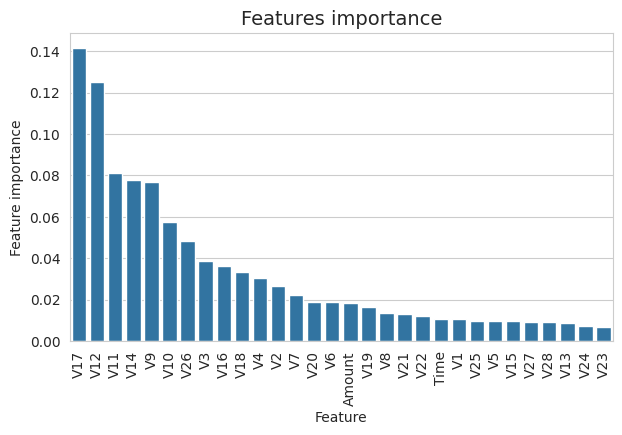

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()
#формирует визуализацию

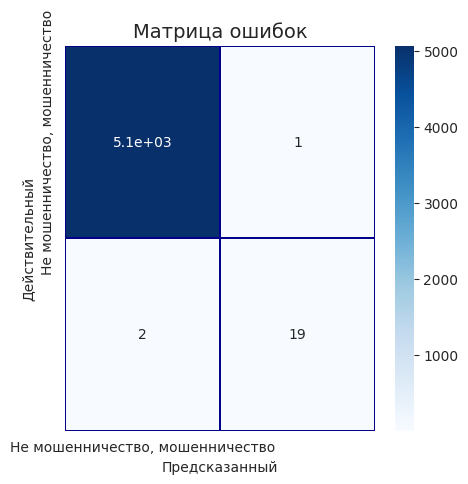

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Действительный'], colnames=['Предсказанный'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Не мошенничество, мошенничество'],
            yticklabels=['Не мошенничество, мошенничество'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Матрица ошибок', fontsize=14)
plt.show()
#Наглядная визуализация

In [ ]:
roc_auc_score(valid_df[target].values, preds)
#выводет численное значение показателя ROC-AUC
#ROC-AUC это числовой показатель, характеризующий качество бинарной классификации модели. Он измеряет способность модели отличать положительные примеры от отрицательных

np.float64(0.9522822162040171)

In [ ]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)
#создает модель, состоящую из множества слабых классификаторов

In [ ]:
clf.fit(train_df[predictors], train_df[target].values)
#Процесс обучения

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8, n_estimators=100,
                   random_state=305)

In [ ]:
preds = clf.predict(valid_df[predictors])
#классифицирует экземпляры из проверочного набора данных

<ipython-input-136-6d35f997139b>:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



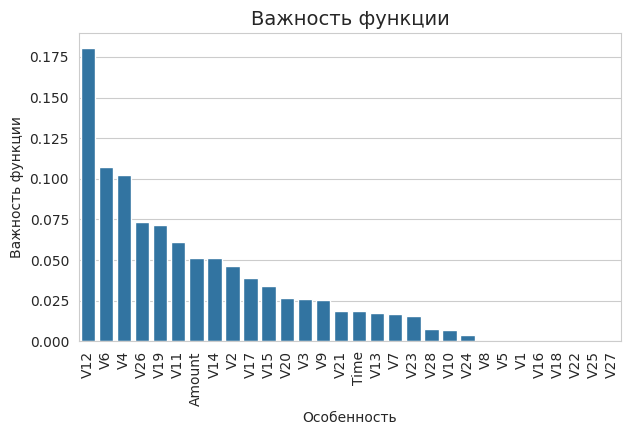

In [ ]:
tmp = pd.DataFrame({'Особенность': predictors, 'Важность функции': clf.feature_importances_})
tmp = tmp.sort_values(by='Важность функции',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Важность функции',fontsize=14)
s = sns.barplot(x='Особенность',y='Важность функции',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()
#Визуально представляет, какой вклад вносят конкретные признаки в решение модели

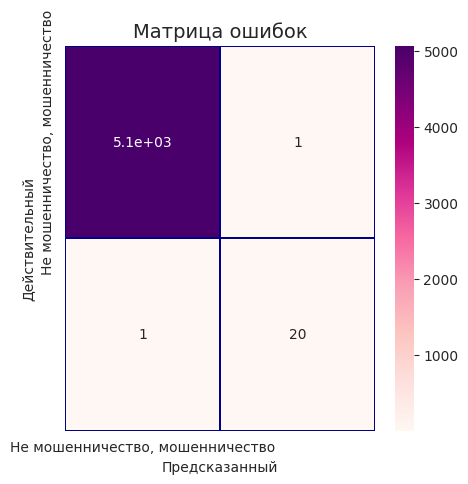

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Действительный'], colnames=['Предсказанный'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Не мошенничество, мошенничество'],
            yticklabels=['Не мошенничество, мошенничество'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="RdPu")
plt.title('Матрица ошибок', fontsize=14)
plt.show()
#демонстрирует правильность и ошибки классификации модели

In [ ]:
roc_auc_score(valid_df[target].values, preds)
# вывод численного значения ROC-AUC

np.float64(0.9760917400135409)

In [ ]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)
#инициализирует модель CatBoost с вышеуказанными параметрами

In [ ]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)
#обучение модели на имеющихся данных

0:	total: 296ms	remaining: 2m 27s
50:	total: 15.3s	remaining: 2m 14s
100:	total: 29s	remaining: 1m 54s
150:	total: 42.9s	remaining: 1m 39s
200:	total: 57s	remaining: 1m 24s
250:	total: 1m 10s	remaining: 1m 10s
300:	total: 1m 24s	remaining: 56.2s
350:	total: 1m 39s	remaining: 42.3s
400:	total: 1m 54s	remaining: 28.2s
450:	total: 2m 8s	remaining: 14s
499:	total: 2m 23s	remaining: 0us


In [ ]:
preds = clf.predict(valid_df[predictors])
# генерирует предсказания для проверочного набора данных

<ipython-input-142-d08d906f7cd9>:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



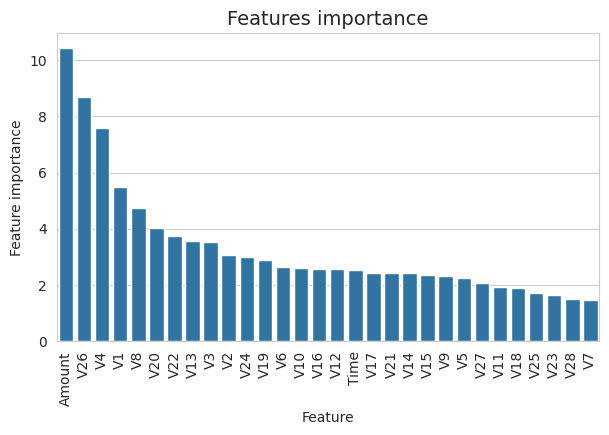

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()
#визуализирует важность признаков, используемых моделью

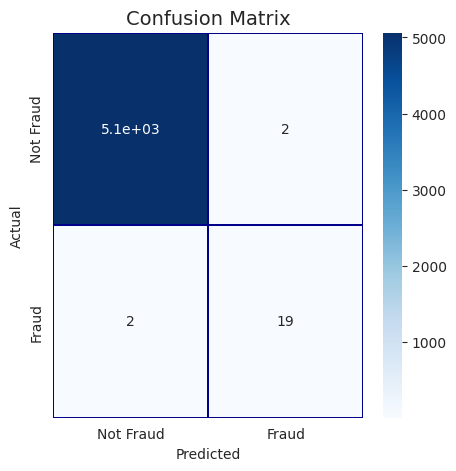

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
#показывает четкую картину правильного и неправильного отнесения транзакций к классам

In [ ]:
roc_auc_score(valid_df[target].values, preds)
#выдает численное значение ROC-AUC, которое помогает количественно оценить качество классификации модели

np.float64(0.9521834800270819)

In [ ]:
test_df = test_df.dropna(subset=[target]).replace([np.inf, -np.inf], np.nan).dropna()
test_df.fillna(test_df.mean(), inplace=True)
print(test_df.isnull().sum())  # Найти NaN
#в файле были пустые значения которые мещали работе програмы, которыем были убраны этим кодом

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64


In [ ]:
# Подготовка обучающих и валидных наборов данных
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)
#Что отслеживать (в данном случае **train** и **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Установка параметров xgboos
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [ ]:
model = xgb.train(params,
                dtrain,
                MAX_ROUNDS,
                watchlist,
                early_stopping_rounds=EARLY_STOP,
                maximize=True,
                verbose_eval=VERBOSE_EVAL)
#обучает модель XGBoost с заданными параметрами

[0]	train-auc:0.96113	valid-auc:0.92839
[50]	train-auc:0.96019	valid-auc:0.95079
[52]	train-auc:0.96762	valid-auc:0.95042


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:723: FutureWarning:

Pass `evals` as keyword args.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:23:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.




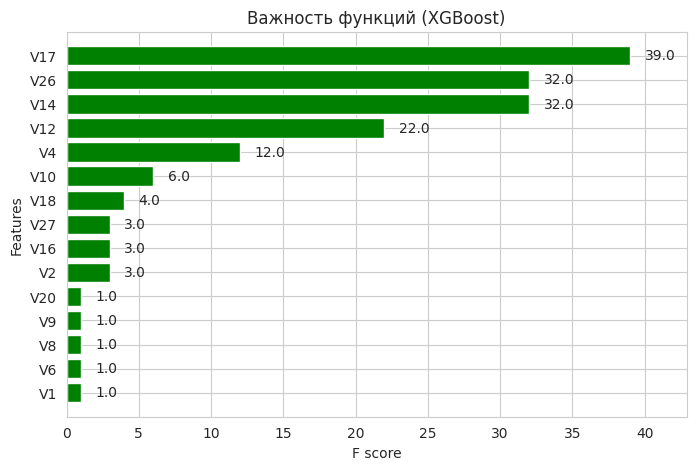

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Важность функций (XGBoost)", ax=ax, color="green")
plt.show()
#генерирует удобную визуализацию

In [ ]:
preds = model.predict(dtest)
# генерирует прогнозы для тестового набора данных с помощью обученной модели XGBoost

In [ ]:
roc_auc_score(test_df[target].values, preds)
#выдает численное значение ROC-AUC, которое показывает, насколько хорошо модель различает положительные и отрицательные классы

np.float64(0.9345963480044172)

In [ ]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced
         }
         # задаёт важную настройку для обучения модели LightGBM, ориентированной на задачу бинарной классификации с учётом сильных перекосов в балансе классов и риска переобучения

In [ ]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)
#создание специализированных объектов данных (`dtrain` и `dvalid`), готовые для передачи в модель LightGBM

In [189]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    valid_sets=[dtrain, dvalid],
    valid_names=['train', 'valid'],
    num_boost_round=MAX_ROUNDS,
    callbacks=[
        lgb.early_stopping(stopping_rounds=2 * EARLY_STOP, verbose=True),
        lgb.log_evaluation(period=VERBOSE_EVAL)
    ]
)
#обучает модель LightGBM, сохраняя результаты оценки качества на тренировочном и проверочном наборах, с поддержкой механизма раннего останова для предотвращения переобучения

Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	train's auc: 0.999975	valid's auc: 0.999737
[100]	train's auc: 1	valid's auc: 0.999774
[150]	train's auc: 1	valid's auc: 0.999925
[200]	train's auc: 1	valid's auc: 0.999962
[250]	train's auc: 1	valid's auc: 0.999972
[300]	train's auc: 1	valid's auc: 0.999972
Early stopping, best iteration is:
[221]	train's auc: 1	valid's auc: 0.999972


<Axes: title={'center': 'Features importance (LightGBM)'}, xlabel='Feature importance', ylabel='Features'>

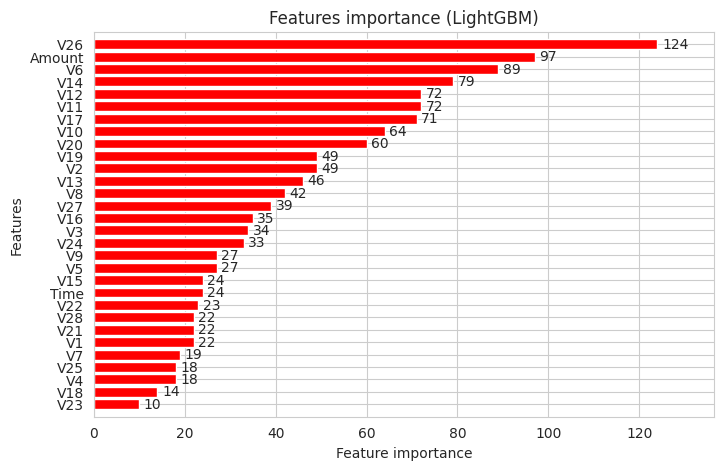

In [192]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red")
#выводим столбчатый график

In [194]:
plt.show()  # Отображение графика
preds = model.predict(test_df[predictors])  # Предсказание на тестовых данных


In [ ]:
roc_auc_score(test_df[target].values, preds)
#выводит численное значение ROC-AUC, которое характеризует качество бинарной классификации модели на тестовом наборе данных

In [213]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Создание массивов и фреймов данных для хранения результатов.
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0

for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx], train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx], train_df[target].iloc[valid_idx]

    model = LGBMClassifier(
    nthread=-1,
    n_estimators=2000,
    learning_rate=0.01,
    num_leaves=80,
    colsample_bytree=0.98,
    subsample=0.78,
    reg_alpha=0.04,
    reg_lambda=0.073,
    subsample_for_bin=50,
    boosting_type='gbdt',
    is_unbalance=False,
    min_split_gain=0.025,
    min_child_weight=40,
    min_child_samples=510,
    objective='binary',
    metric='auc',
    verbosity=VERBOSE_EVAL,
    silent=-1,
    feval=None
)

model.fit(train_x, train_y,
          eval_set=[(train_x, train_y), (valid_x, valid_y)],
          eval_metric='auc',
          callbacks=[lgb.early_stopping(EARLY_STOP)])
oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits

fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = predictors
fold_importance_df["importance"] = model.feature_importances_
fold_importance_df["fold"] = n_fold + 1

feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
print(f'Fold {n_fold + 1} AUC: {roc_auc_score(valid_y, oof_preds[valid_idx]):.6f}')
del model, train_x, train_y, valid_x, valid_y
gc.collect()
n_fold += 1

train_auc_score = roc_auc_score(train_df[target], oof_preds)
print(f'Full AUC score: {train_auc_score:.6f}')
#код выполняет кросс-валидацию с использованием LightGBM для задачи бинарной классификации

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 53, number of negative: 16219
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000006 seconds, init for row-wise cost 0.004405 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 16272, number of used features: 30
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003257 -> initscore=-5.723647
[LightGBM] [Info] St

In [215]:
pred = test_preds
pred

array([0.00065143, 0.00065143, 0.00065143, ..., 0.00065143, 0.00065143,
       0.00065143])